In [3]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
import datetime
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
from numpy import mean,absolute 
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *

In [ ]:
m = 3
J = np.arange(1, l)
df500 = pd.DataFrame(CCI_500)
plt.plot(J,CCI_500[J])

In [ ]:
## THERE'S SOMETHING HERE ####
#CCIsav = sp.signal.savgol_filter(CCI, 305, 3)
fil = sp.signal.savgol_filter(RSI100, 105, 3)
dF2 = sp.signal.savgol_filter(dF2, 75, 3)

plt.rcParams['figure.figsize'] = [10, 10]


In [18]:
plt.rcParams['figure.figsize'] = [30, 10]


In [ ]:
boys_now = 1
n1 = 500
n2 = 1440
while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        n2 += 1
        dlCCI(n2, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
CCIsav = sp.signal.savgol_filter(CCI, 105, 3)

In [ ]:
## What Seems To Work ###

## 1. CCI_len = 30, 5m binsize, 105 filter, -50, 50, short ##

## 2. CCI_len = 75, 1m binsize, 105 filter, -50, 50, short ##


## Update June 4th: 5m vs 1m.

##  5m: cci_len = 15, (0, -20), short, savgol 105

## 1m: cci_len = 95, (0,-10), short, savgol 105

In [ ]:
1/leverage+1

In [ ]:
#10X LEVERAGE, (10, -10, JMAX 200), CCI2_1, X=0!!!

0.5968997281787977
0.985210236414729
4.086552072800809
0
[4.98992816e-33]


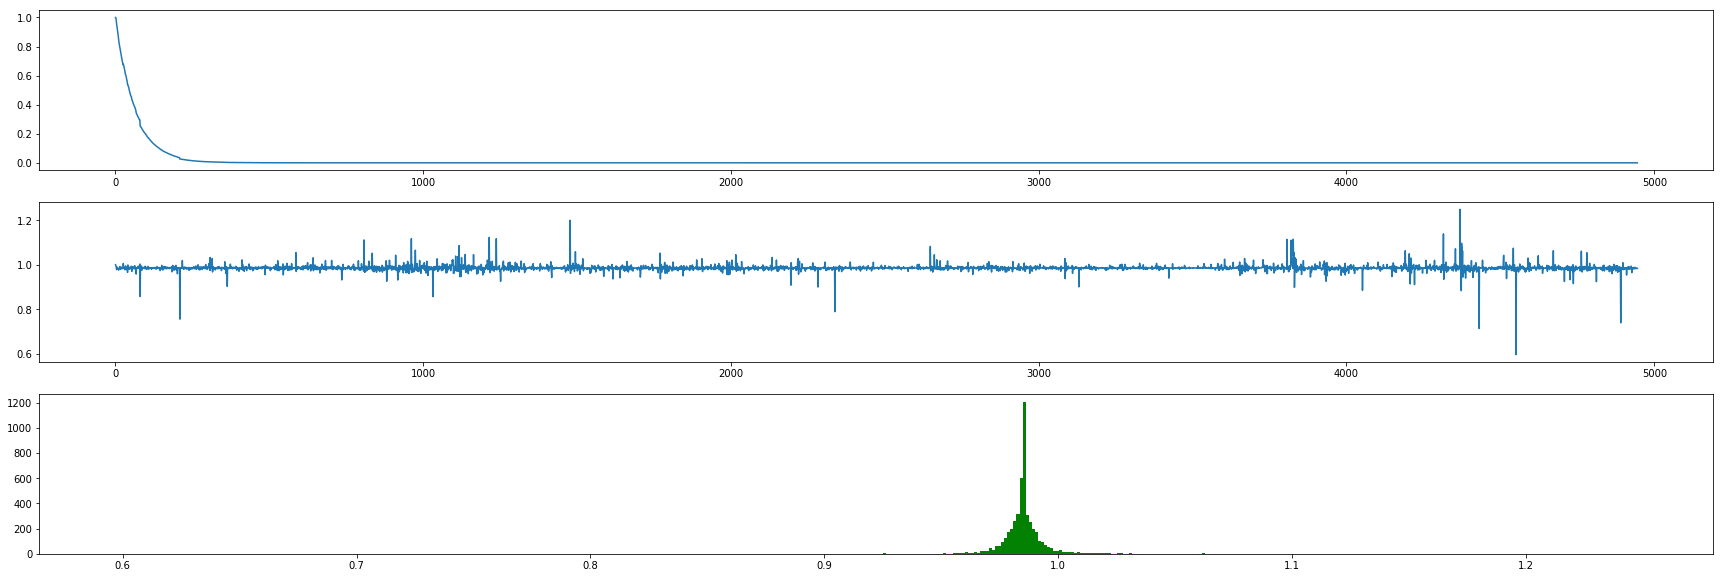

In [368]:

## Short Only ##  (Why is it backwards???)
leverage = 10
hi = 500
lo = -100
jmaxlo = 121
jmaxhi = 212
var = CCI105B
j = 0 #count variable
jlo = 0
jhi = 0
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
X = 0
for i in range(win_len, length):
    if (var[i] <= lo and j == 0):
        j = 1
        jmaxlo = 1
        jmaxhi = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]    
    elif (var[i] >= hi) and (j>=1):
        if jhi == jmaxhi:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
        else: 
            jhi = jhi+1
    elif (var[i] <= lo and j >= 1):
        if jlo == jmaxlo:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
        else:
            jlo = jlo+1
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, length)
plt.subplot(3,1,1)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.subplot(3,1,3)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)
plt.subplot(3,1,2)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
count

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()

0.766221513217867
1.002832714897958
260.4342105263158
0
[0.60170707]


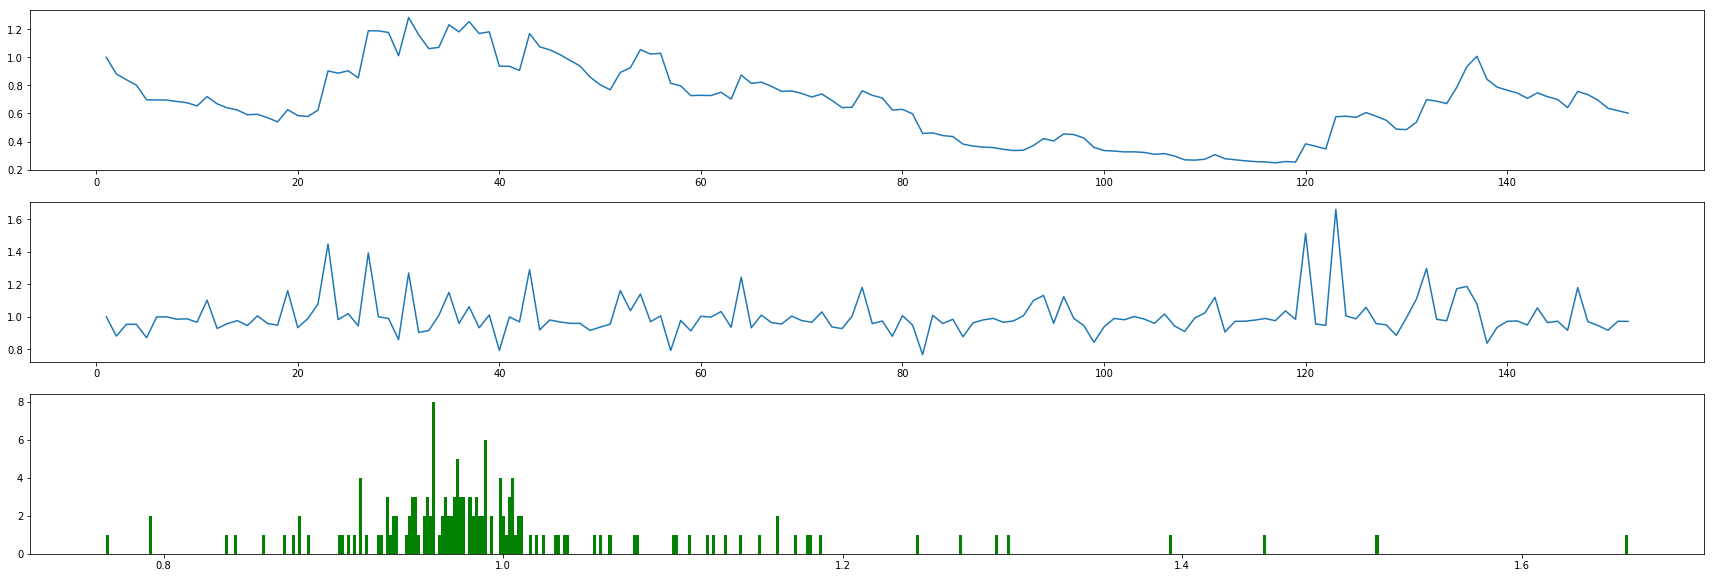

In [380]:

## Short Only ##  (Why is it backwards???)
leverage = 10
hi =200
lo = 100
jmax = 10
var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
X = 0
for i in range(win_len, length):
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]    
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, length)
plt.subplot(3,1,1)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.subplot(3,1,3)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)
plt.subplot(3,1,2)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
count

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()

0.6561903315103642
0.9998340931544253
220.28971962616822
0
[0.54501925]


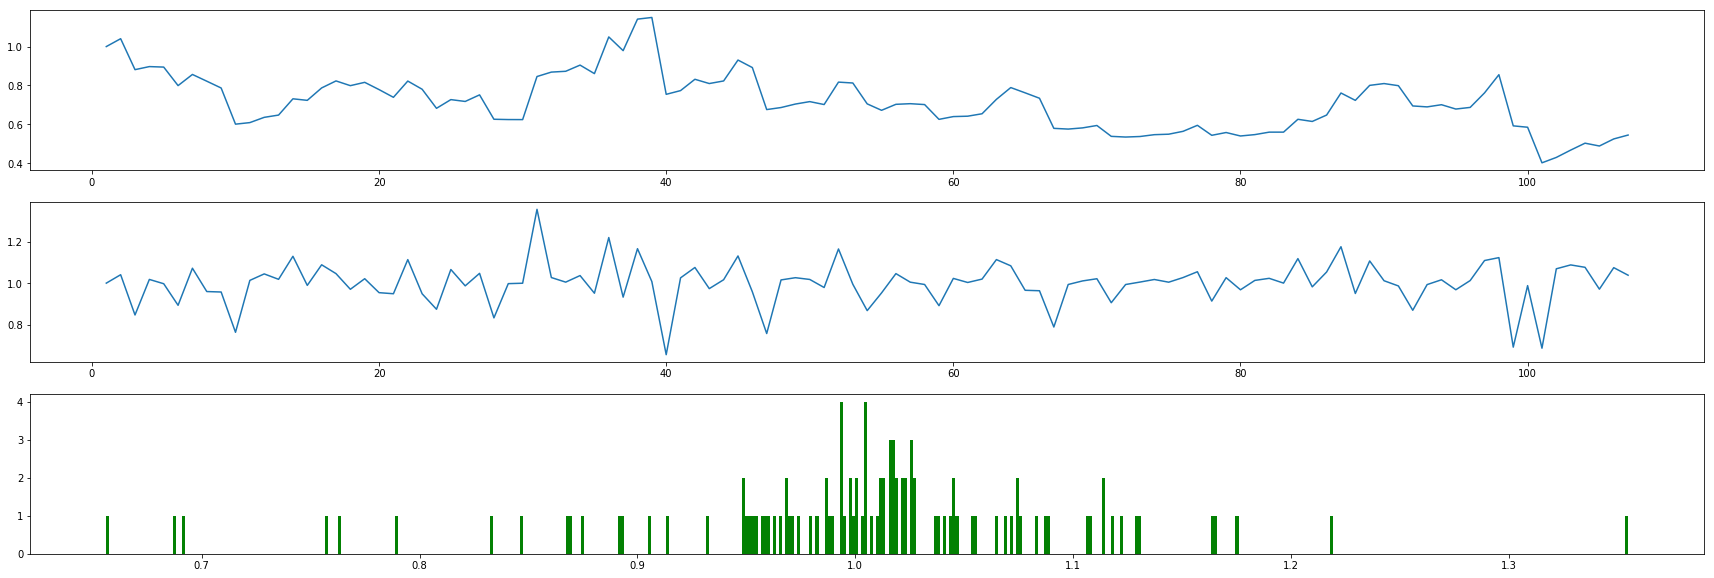

In [320]:

## Short Only ##  (Why is it backwards???)
leverage = 10
hi = 200
lo = 0
jmax = 100
var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
X = 0
for i in range(win_len, length):
    if (var[i] >= hi and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]    
    elif (var[i] <= lo) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, length)
plt.subplot(3,1,1)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.subplot(3,1,3)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)
plt.subplot(3,1,2)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
count

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()

In [ ]:
priceDF = pd.DataFrame(price)

In [ ]:
(1/leverage+1)*price[k,0]

In [ ]:
#destroy it!

In [ ]:
price.iloc[50, 3]

In [ ]:
len(close)

In [ ]:
close[27]

In [ ]:
print(CCI)

In [ ]:
name

In [ ]:
price.loc[52, 'time']

In [ ]:
print(pd.DataFrame(CCIAli105B))

In [ ]:
4.579964*1.5759

In [ ]:
(7544/7416 - 1-.00075*2)*100

In [ ]:
price.iloc[25, 1]

In [ ]:
high[price]

In [ ]:
1+1/leverage

In [ ]:
np.where(pnlT>10)

In [ ]:
np.where(pnlT>1000)

In [ ]:
price.loc[31, 'time']

In [ ]:
d

In [ ]:
price.loc[71, 'time']

In [ ]:
name

In [ ]:
high[-1:]

In [ ]:
high[10:95]

In [4]:
## CCI and RSI init only ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCIAli = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len= 85
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCIAli[i] = CCIAli[i-1]
    else: 
        CCIAli[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCIAli, 205, 3)
time3 = pd.Series(datetime.datetime.now().timetuple())

           #print(RSIclose[i])
Mytime = (time3[5]-time2[5])
print(Mytime)


9


In [5]:
CCI105C = pd.Series(np.zeros(l))
for i in range(cci_len+405, l):
    if i > cci_len+405:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-305:i],305,2)
        CCI105C[i] = CCI105[-1:]

In [104]:
CCI1 = sp.signal.savgol_filter(CCIAli,105,3)     

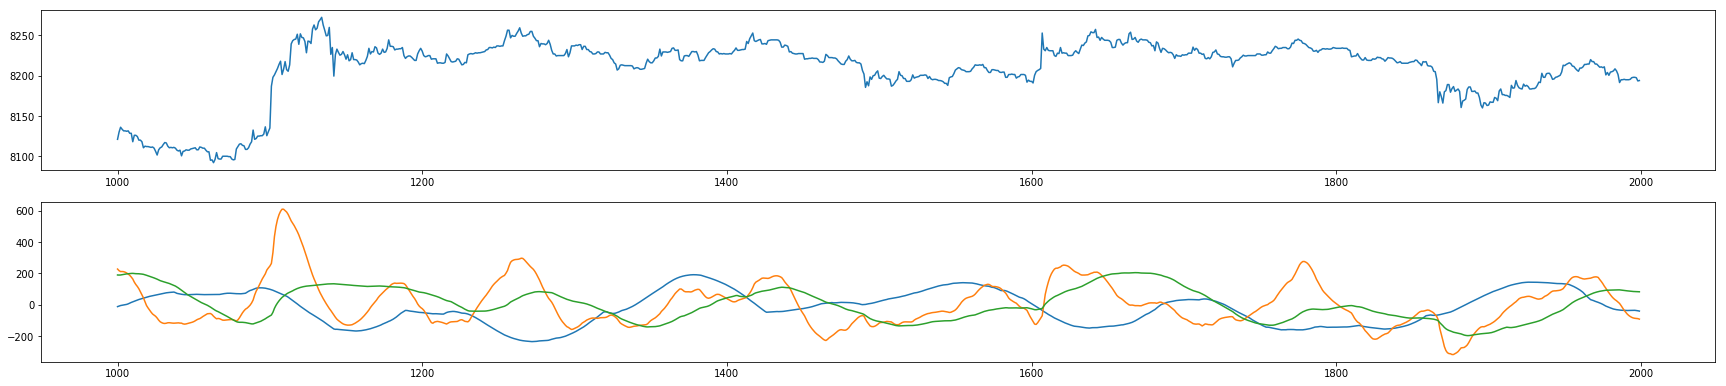

In [347]:
J = np.arange(1000,2000)
plt.subplot(3, 1, 1)
plt.plot(J, close[J])
plt.subplot(3, 1, 2)
#plt.plot(J, CCI1051[J])
#plt.plot(J, CCI25_1[J])
#plt.plot(J, CCI25_2[J])
plt.plot(J, CCI1[J])
#plt.plot(J, CCI105_1[J])
plt.plot(J,CCI105B[J])
plt.plot(J,CCI105C[J])
#plt.plot(J, CCI25[J])
#plt.plot(J, CCI25_1[J])
#plt.subplot(3, 1, 3)
#plt.plot(J, CCI3[J])

In [ ]:
for i in range(cci_len, len(close)):
    CCIAli105[i] = sp.signal.savgol_filter(CCI[])

In [4]:
name = '7_Jun16.csv'

In [251]:
name = '30_Jun16.csv'
M = 30
dl(30*1440, name)

In [2]:
def mad(data):
    return mean(absolute(data-mean(data)))


def mad2(data1, data2):
    return mean(absolute(data1 - data2))

In [250]:
def dl(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
M = 30/5
name = '1440_30_5m_Jun7.csv'
dl5m(1440*M, name)

In [1]:
name = '7_Jun16.csv'

In [ ]:
name = '1440_30_1m_Jun5.csv'

In [ ]:
name = '1440_7_Jun3.csv'

In [ ]:
name = '500J3.csv'

In [ ]:
def dlCCI1m(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()
            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break
                
                
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=95
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = mad(TP[i-cci_len:i])
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI105 = sp.signal.savgol_filter(CCI, 105, 4)
    CCI125 = sp.signal.savgol_filter(CCI, 105, 4)
    cci500df = pd.DataFrame(CCI)
    print(cci500df)

In [ ]:
dlshort_cci(500, '500J3_2.csv')

In [ ]:
def dl_st(name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low&startTime=2018-06-05T05%3A10%3A00.000Z"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            #if query['start'] > num-1:
            #    break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=95
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = mad(TP[i-cci_len:i])
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI_500 = sp.signal.savgol_filter(CCI, 105, 3)
    cci500df = pd.DataFrame(CCI_500)
    print(cci500df)

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
def dl1m(start, end,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
def dl5m(num,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > num:
                break
            if len(data) < count:
                break

In [ ]:
boys_now = 1

while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        dlCCI1m(900, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
dlshortCCI(500, '500J3_10.csv')

In [ ]:
dlCCI(1440, '1440j3_try.csv')

In [ ]:
name = '1440_30_1m_Jun7.csv'
dl1m(1440*30,1440*60, name)

In [ ]:
name = '1440_30_1m_Jun5.csv'

In [ ]:
pd.set_option('display.max_rows',6000)

In [ ]:
f=0
d=0
rsi_len = 100
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])

In [ ]:
fil = sp.signal.savgol_filter(RSI100, 105, 3)

In [ ]:
'1440_30_2_1m_Jun7.csv'